In [1]:
%load_ext rpy2.ipython

In [9]:
%%R -o featdata.all -o featdata.lud

library('gridGraphics')
#library('cowplot')
source('./analysis_tools/kiviat_plotter.R')
load('./analysis_tools/newfeat.Rdf')
source('./analysis_tools/restructure_aiwc_data.R')

featdata.all <- drop_metrics_for_simple_kiviat(featdata.all)
featdata.kmeans <- subset(featdata.all,application=="kmeans")
featdata.lud    <- subset(featdata.all,application=="lud")
featdata.csr    <- subset(featdata.all,application=="csr")
featdata.fft    <- subset(featdata.all,application=="fft")
featdata.gem    <- subset(featdata.all,application=="gem")
featdata.dwt    <- subset(featdata.all,application=="dwt")
featdata.srad   <- subset(featdata.all,application=="srad")
featdata.bfs    <- subset(featdata.all,application=="bfs")
featdata.hmm    <- subset(featdata.all,application=="hmm")
featdata.nw     <- subset(featdata.all,application=="nw")
featdata.crc    <- subset(featdata.all,application=="crc")

#source('./analysis_tools/stacked_features.R')


Rebuild figures in the paper:

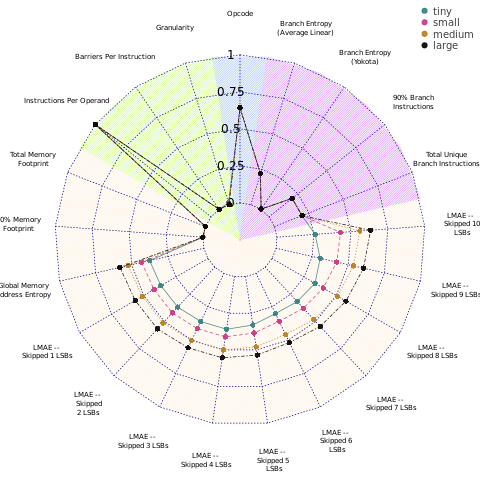

In [10]:
%%R -i featdata.lud featdata.all

x <- reorder_and_subset(featdata=featdata.lud,size='tiny',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- x
x <- reorder_and_subset(featdata=featdata.lud,size='small',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='medium',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='large',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)

nv <- subset(reorder_features(featdata.all),select=-c(size,kernel,application,invocation))
plot_kiviat(y,nv,colour="black",colour_spokes=TRUE,all_sizes=TRUE)